In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from plot_diff_si import * 


# To do 
- connector Sym with the corrected prefactor (int fxc(rr', nrr')) 
- Linear Sym with the corrected prefactor 
- connector with mean density 
- Linear approx with mean density 
- connector with local density 
- Linear with local density
- LDA 
- MDA   

# Si

In [2]:
si_data= pd.read_csv("si_qmc_dens_vxc.csv",index_col=0)

In [3]:
newdens_QMC = si_data["density_qmc"].to_numpy()
vxc_qmc=si_data["vxc_qmc"].to_numpy()
newerbar_QMC = si_data["erbar_qmc"].to_numpy()
erbar= get_dens_inSD_si(newerbar_QMC)

## Analyse

In [9]:
def get_data_from_npz(npz_file, it=-1): 
    hold= np.load(npz_file)
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    bands=hold["bands_history"][it]
    residu= hold["diff_l"].real
    direct_gap=(bands[0,4]-bands[0,3]) * 27.211
    gap=np.min( np.abs(bands[:,4]-bands[0,3]) ) * 27.211
    print("============")
    print("diff on density for the last iteration: {:.2e}".format(residu[it]))
    print("The direct gap is {:.4f} ev | QMC = 2.72 ev".format(direct_gap))
    #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
    print("============")

    return dens, vxc, direct_gap, gap, residu, bands 

## Connector 

In [17]:
! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/IntPrefact/si_IntPrefactorcon_consym.npz si_IntPrefactor_con_consym_v2.npz
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_con_consym.npz .
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_newPrefOldconsym_consym.npz .

si_IntPrefactorcon_consym.npz                 100%   17MB 894.6KB/s   00:19    


diff on density for the last iteration: 1.63e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev


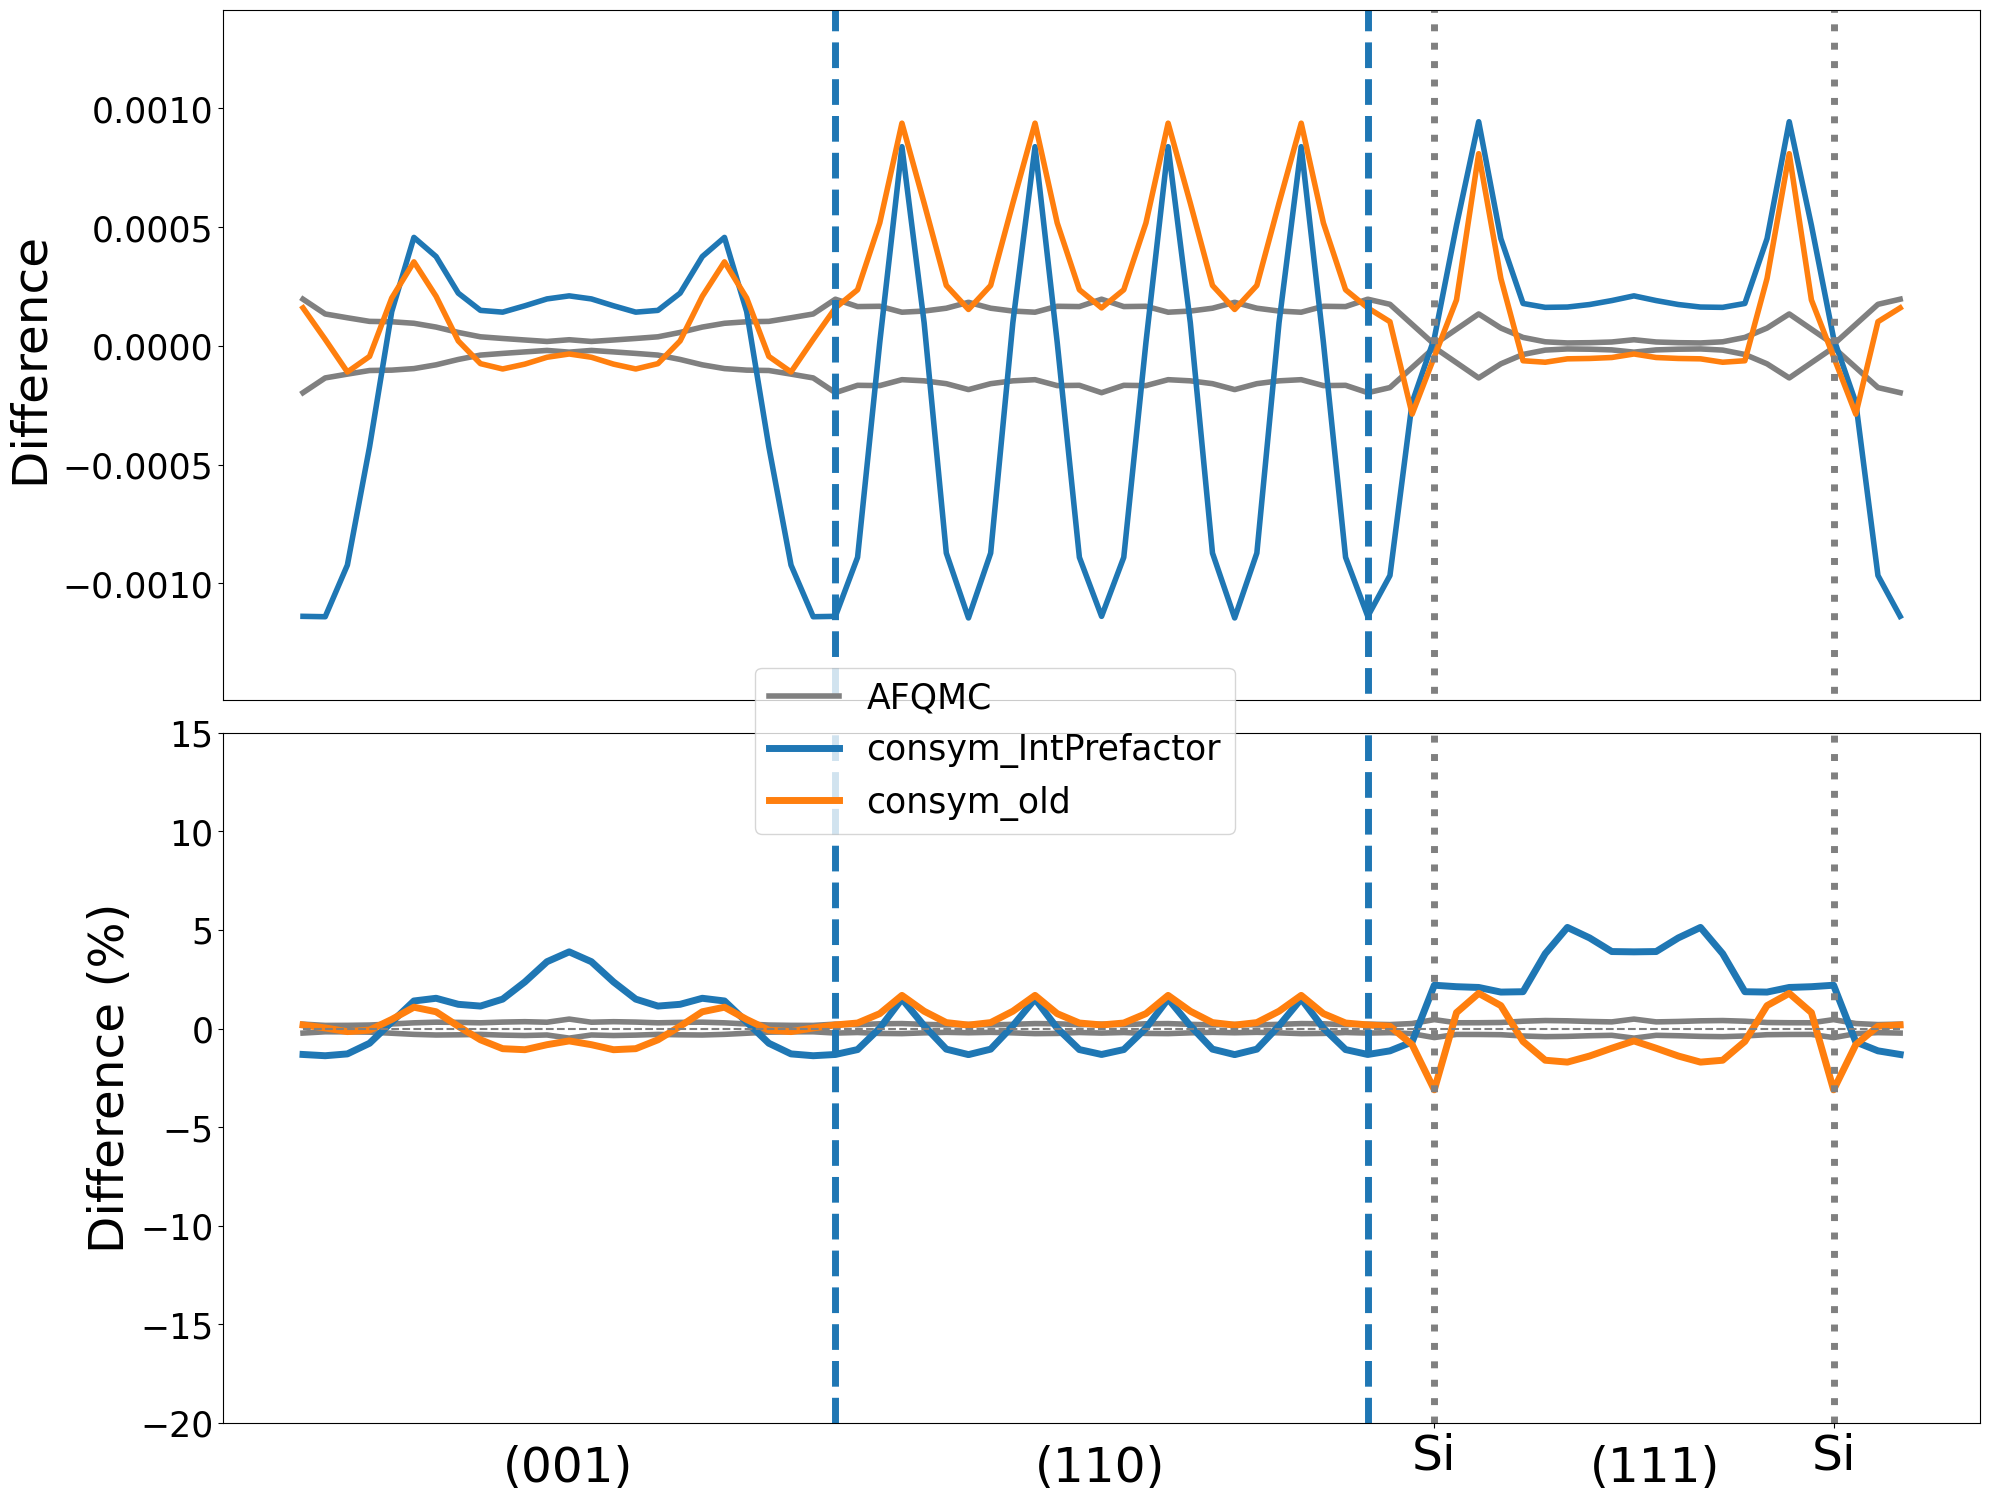

In [18]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz", it=-1)
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 

diff_approx= [diff_con1, diff_con2] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old"],erbar) 

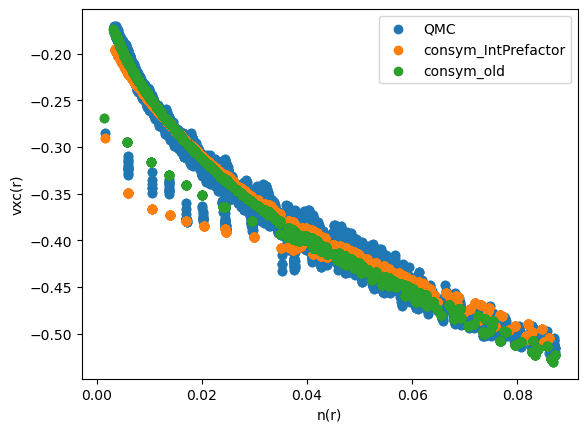

In [21]:
#plt.rcdefaults()
#with plt.style.context("latex-sans"):
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [11]:
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_lin_linear_consym.npz .

si_IntPrefactor_lin_linear_consym.npz         100% 7273KB  88.2MB/s   00:00    


diff on density for the last iteration: 1.63e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev


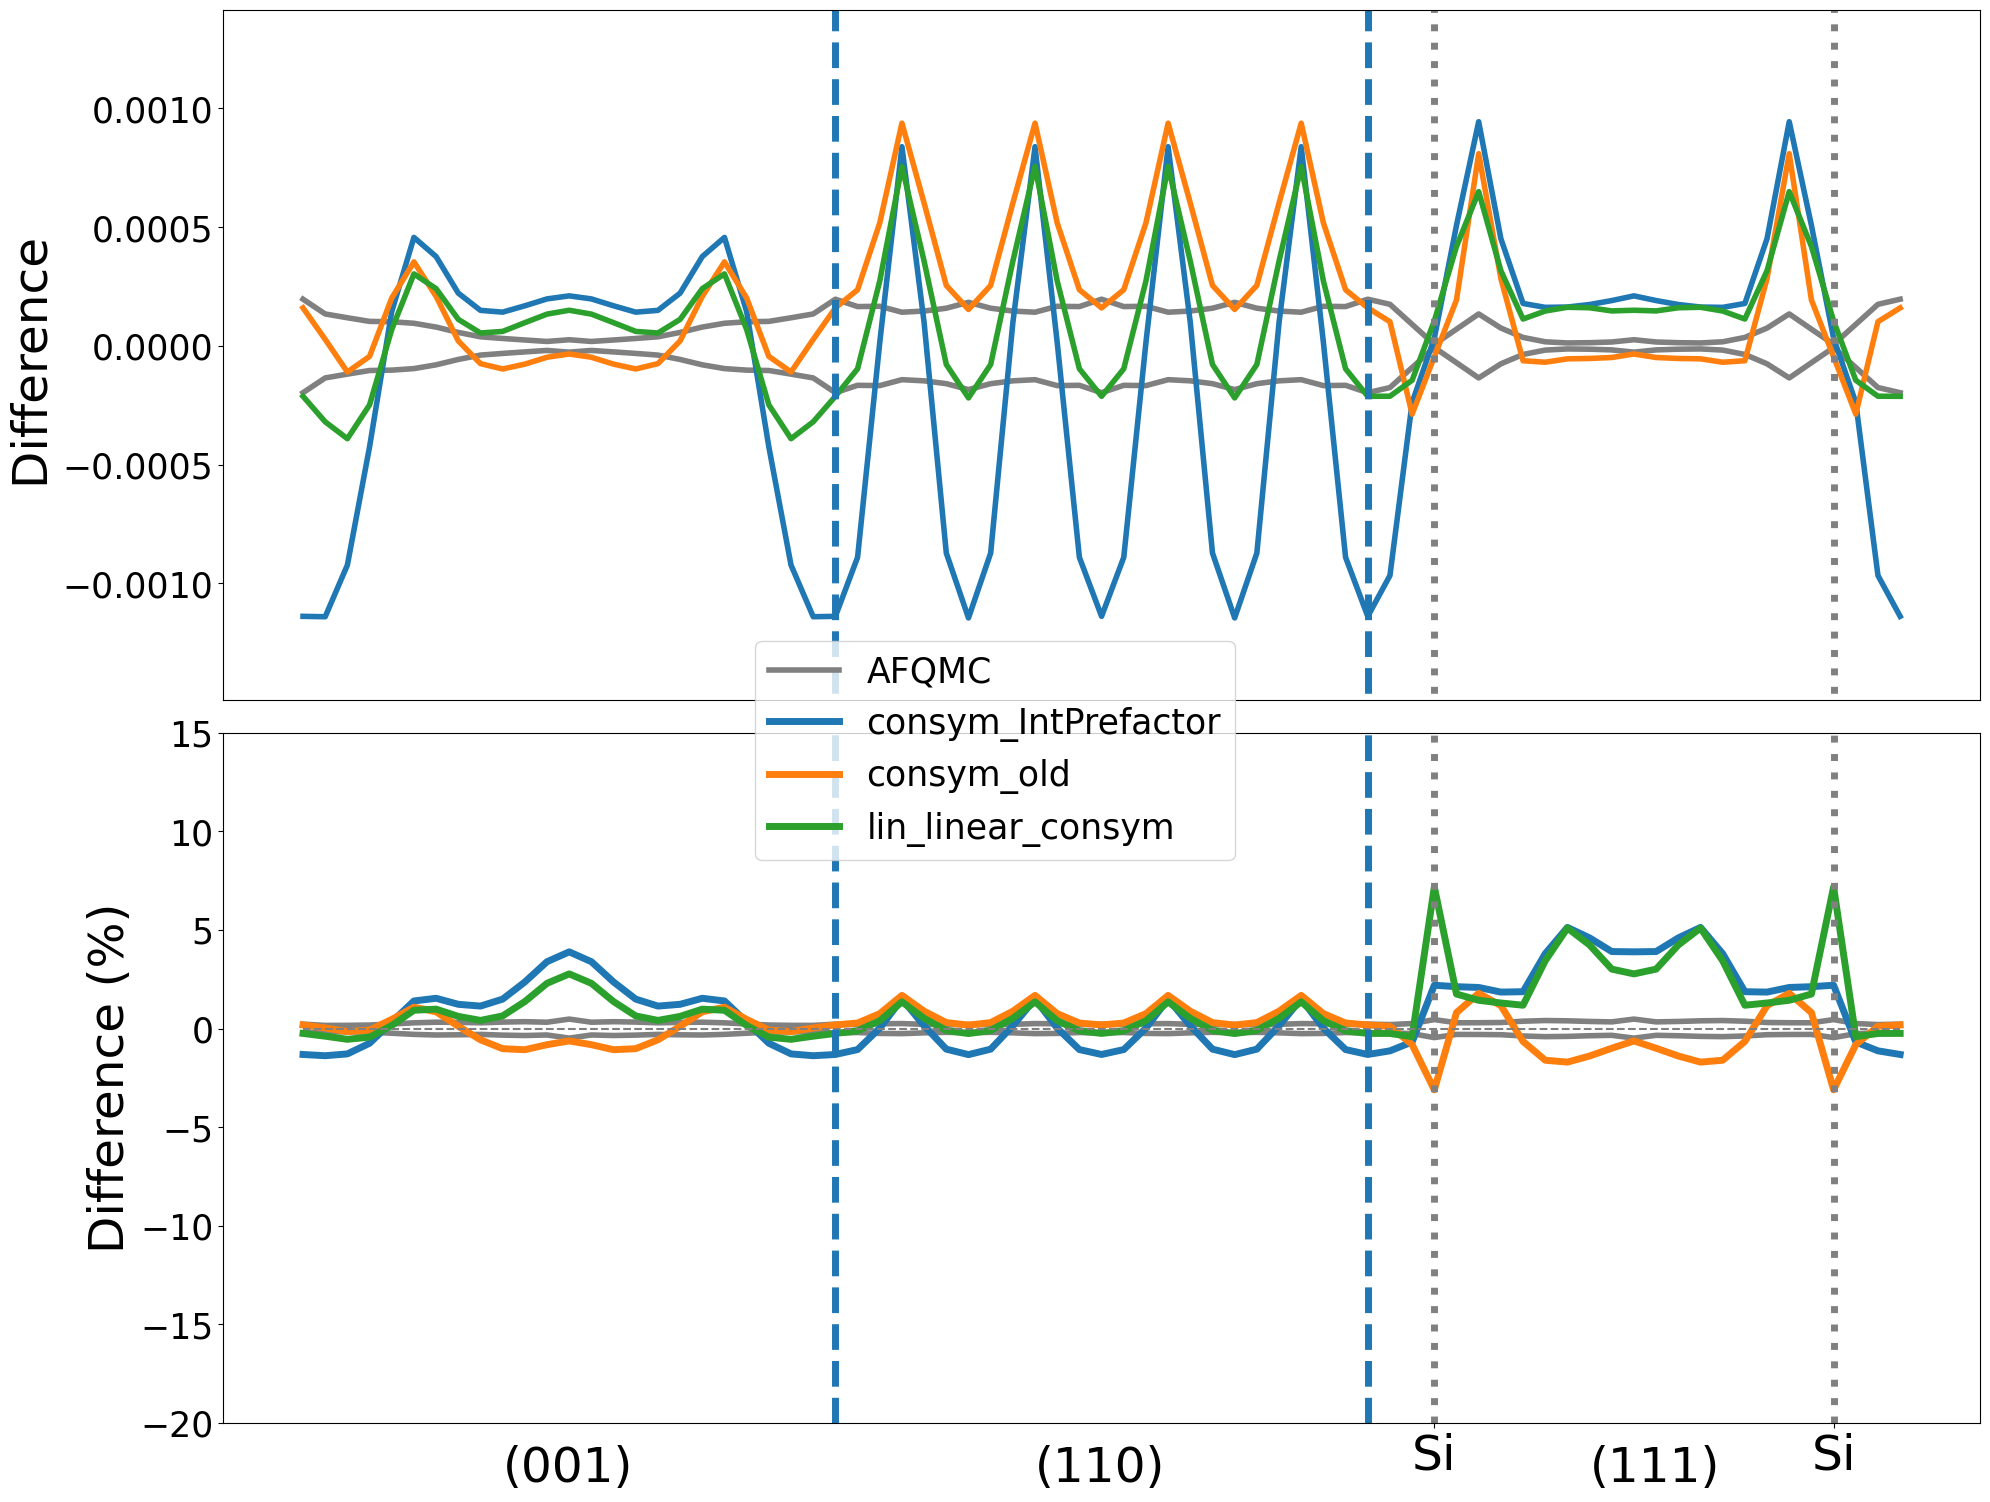

In [30]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz")
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
dens_con3= np.load("densLinSym_direct.npz")["densR"]

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 
diff_con3= get_dens_inSD_si(dens_con3)-get_dens_inSD_si(newdens_QMC) 

diff_approx= [diff_con1, diff_con2,diff_con3] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old","lin_linear_consym"],erbar) 

# NaCl 

In [3]:
from plot_diff_nacl import * 
nacl_data=pd.read_csv("nacl_qmc.csv")


In [4]:
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
erbar_nacl=nacl_QMC_prim[:,-1]

In [13]:
def get_data_from_npz_nacl(npz_file, it=-1,skip_band=0): 
    hold= np.load(npz_file)
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    if not skip_band:
        bands=hold["bands_history"][it]
        residu= hold["diff_l"].real
        direct_gap=(bands[0,8]-bands[0,7]) * 27.211
        gap=np.min( np.abs(bands[:,8]-bands[0,7]) ) * 27.211
        print("============")
        print("diff on density for the last iteration: {:.2e}".format(residu[it]))
        print("The direct gap is {:.4f} ev | QMC = 5.25 ev".format(direct_gap))
        #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
        print("============")
        return dens, vxc, direct_gap, gap, residu, bands 
    return dens , vxc 

In [9]:
newdens_QMC_nacl = nacl_data["dens"].to_numpy()
vxc_qmc_nacl=nacl_data["vxc_corr_shift"].to_numpy()
##
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
newerbar_QMC_nacl=nacl_QMC_prim[:,-1]
##
erbar_nacl= get_dens_inSD_nacl(newerbar_QMC_nacl)

## Connector 

diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev


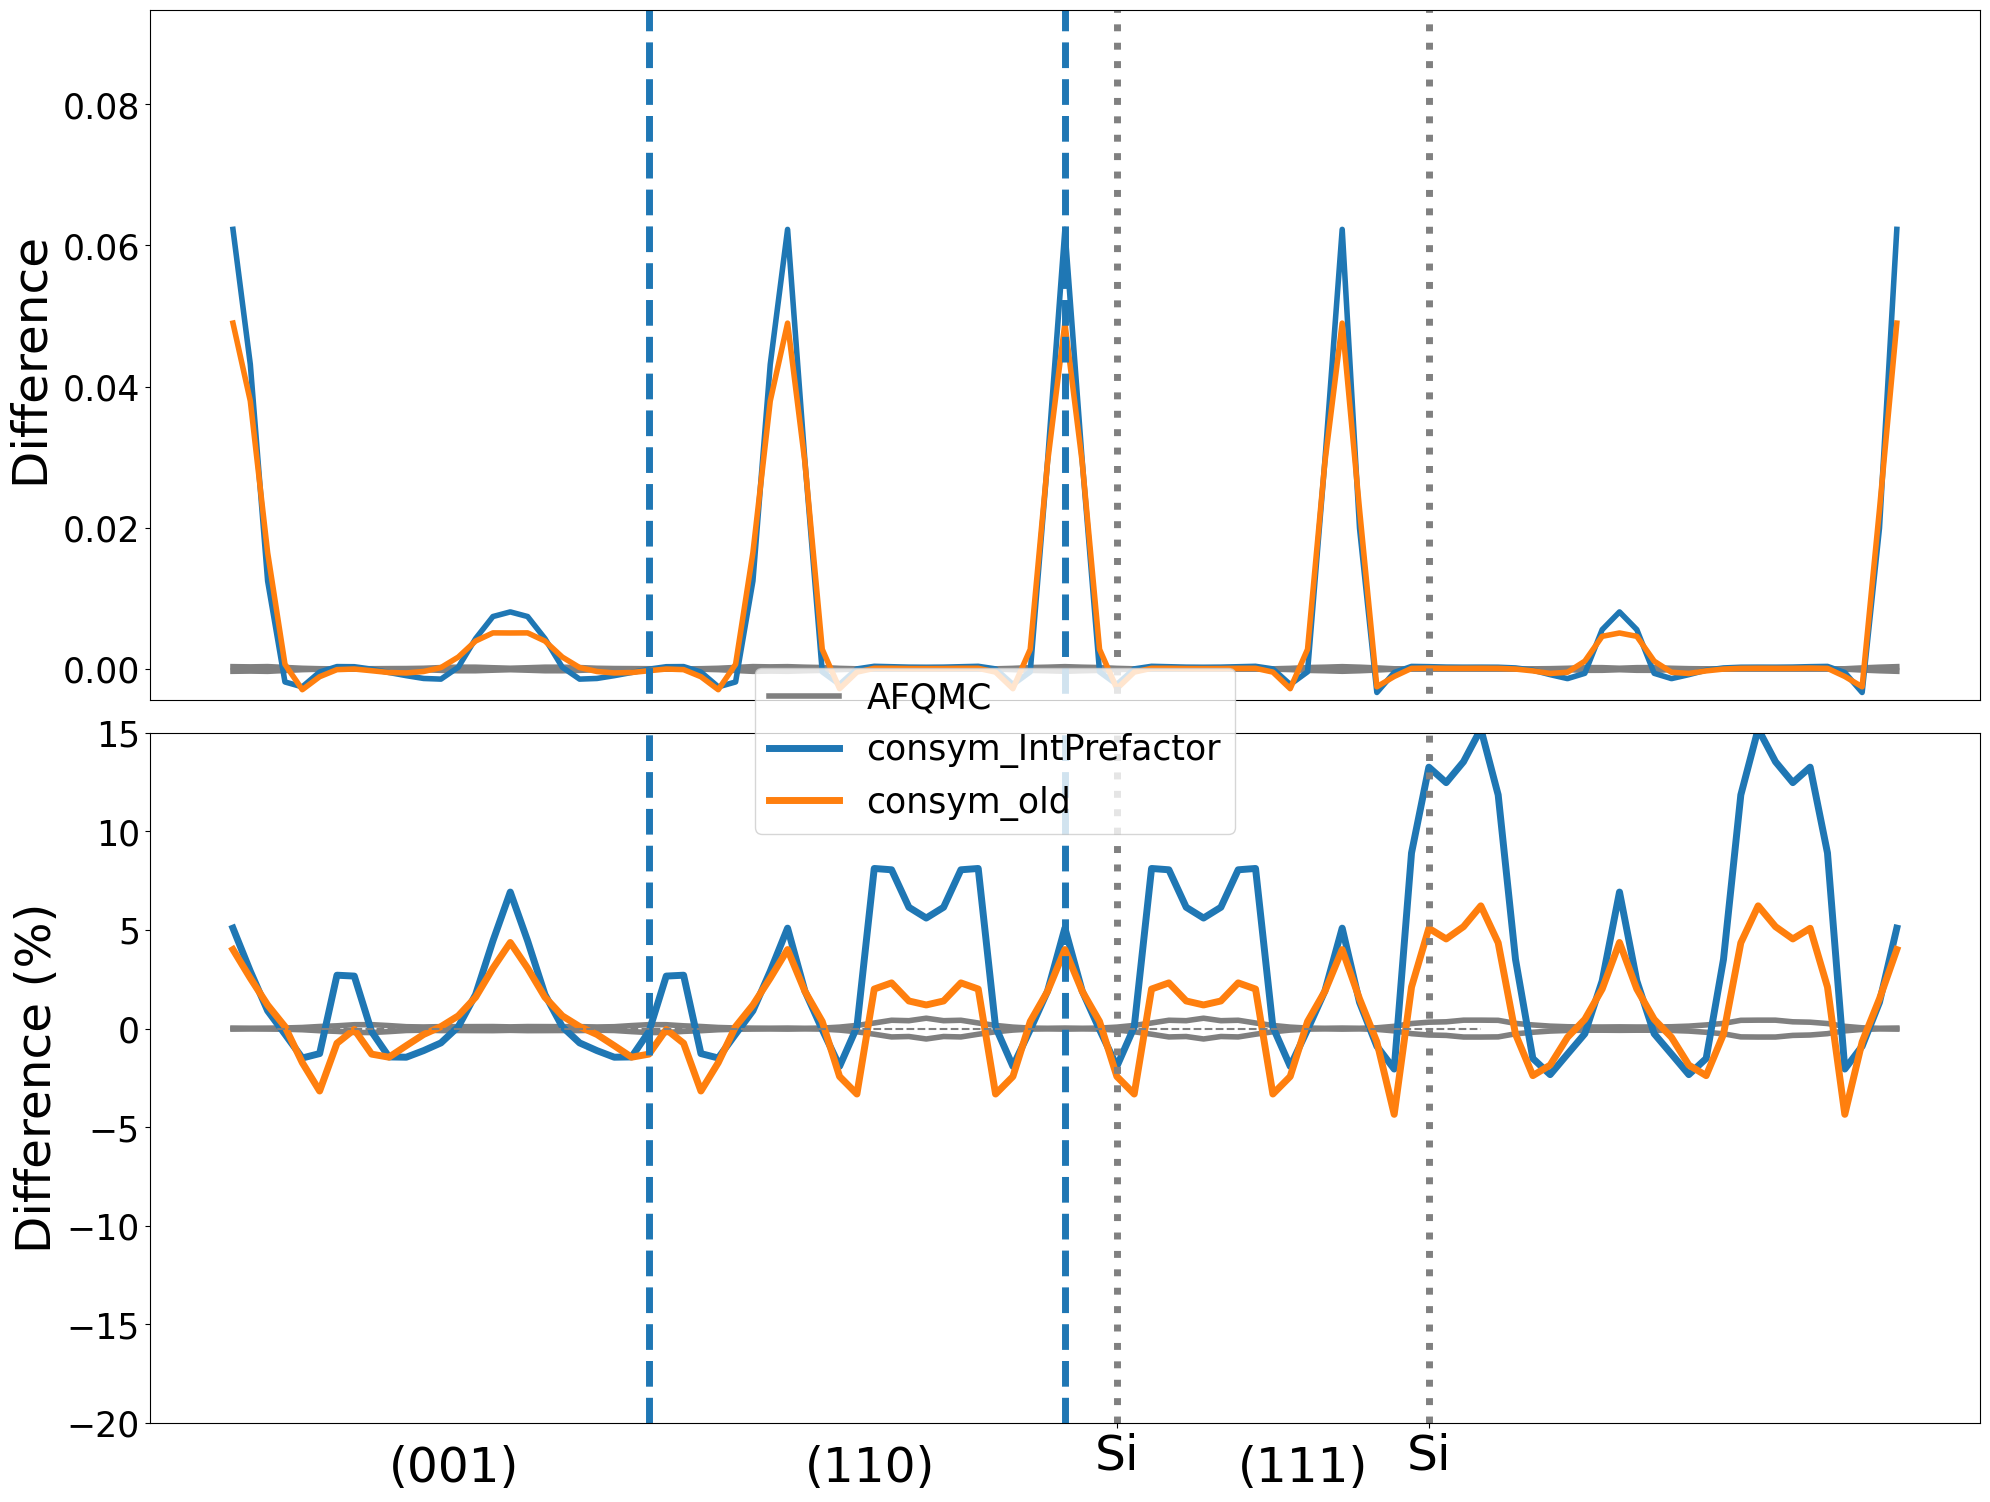

In [10]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz", it=-1)
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 

diff_approx= [diff_con1, diff_con2] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old"],erbar_nacl) 

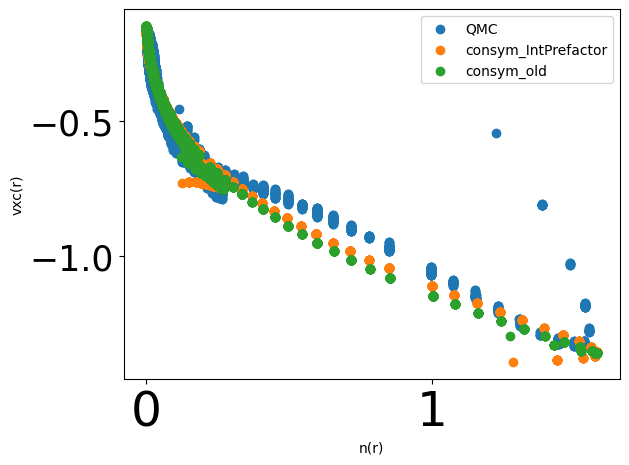

In [11]:
plt.scatter(newdens_QMC_nacl,vxc_qmc_nacl, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [19]:
np.load("dens_history_LinSym_nacl.npz").files

['dens_history']

diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev


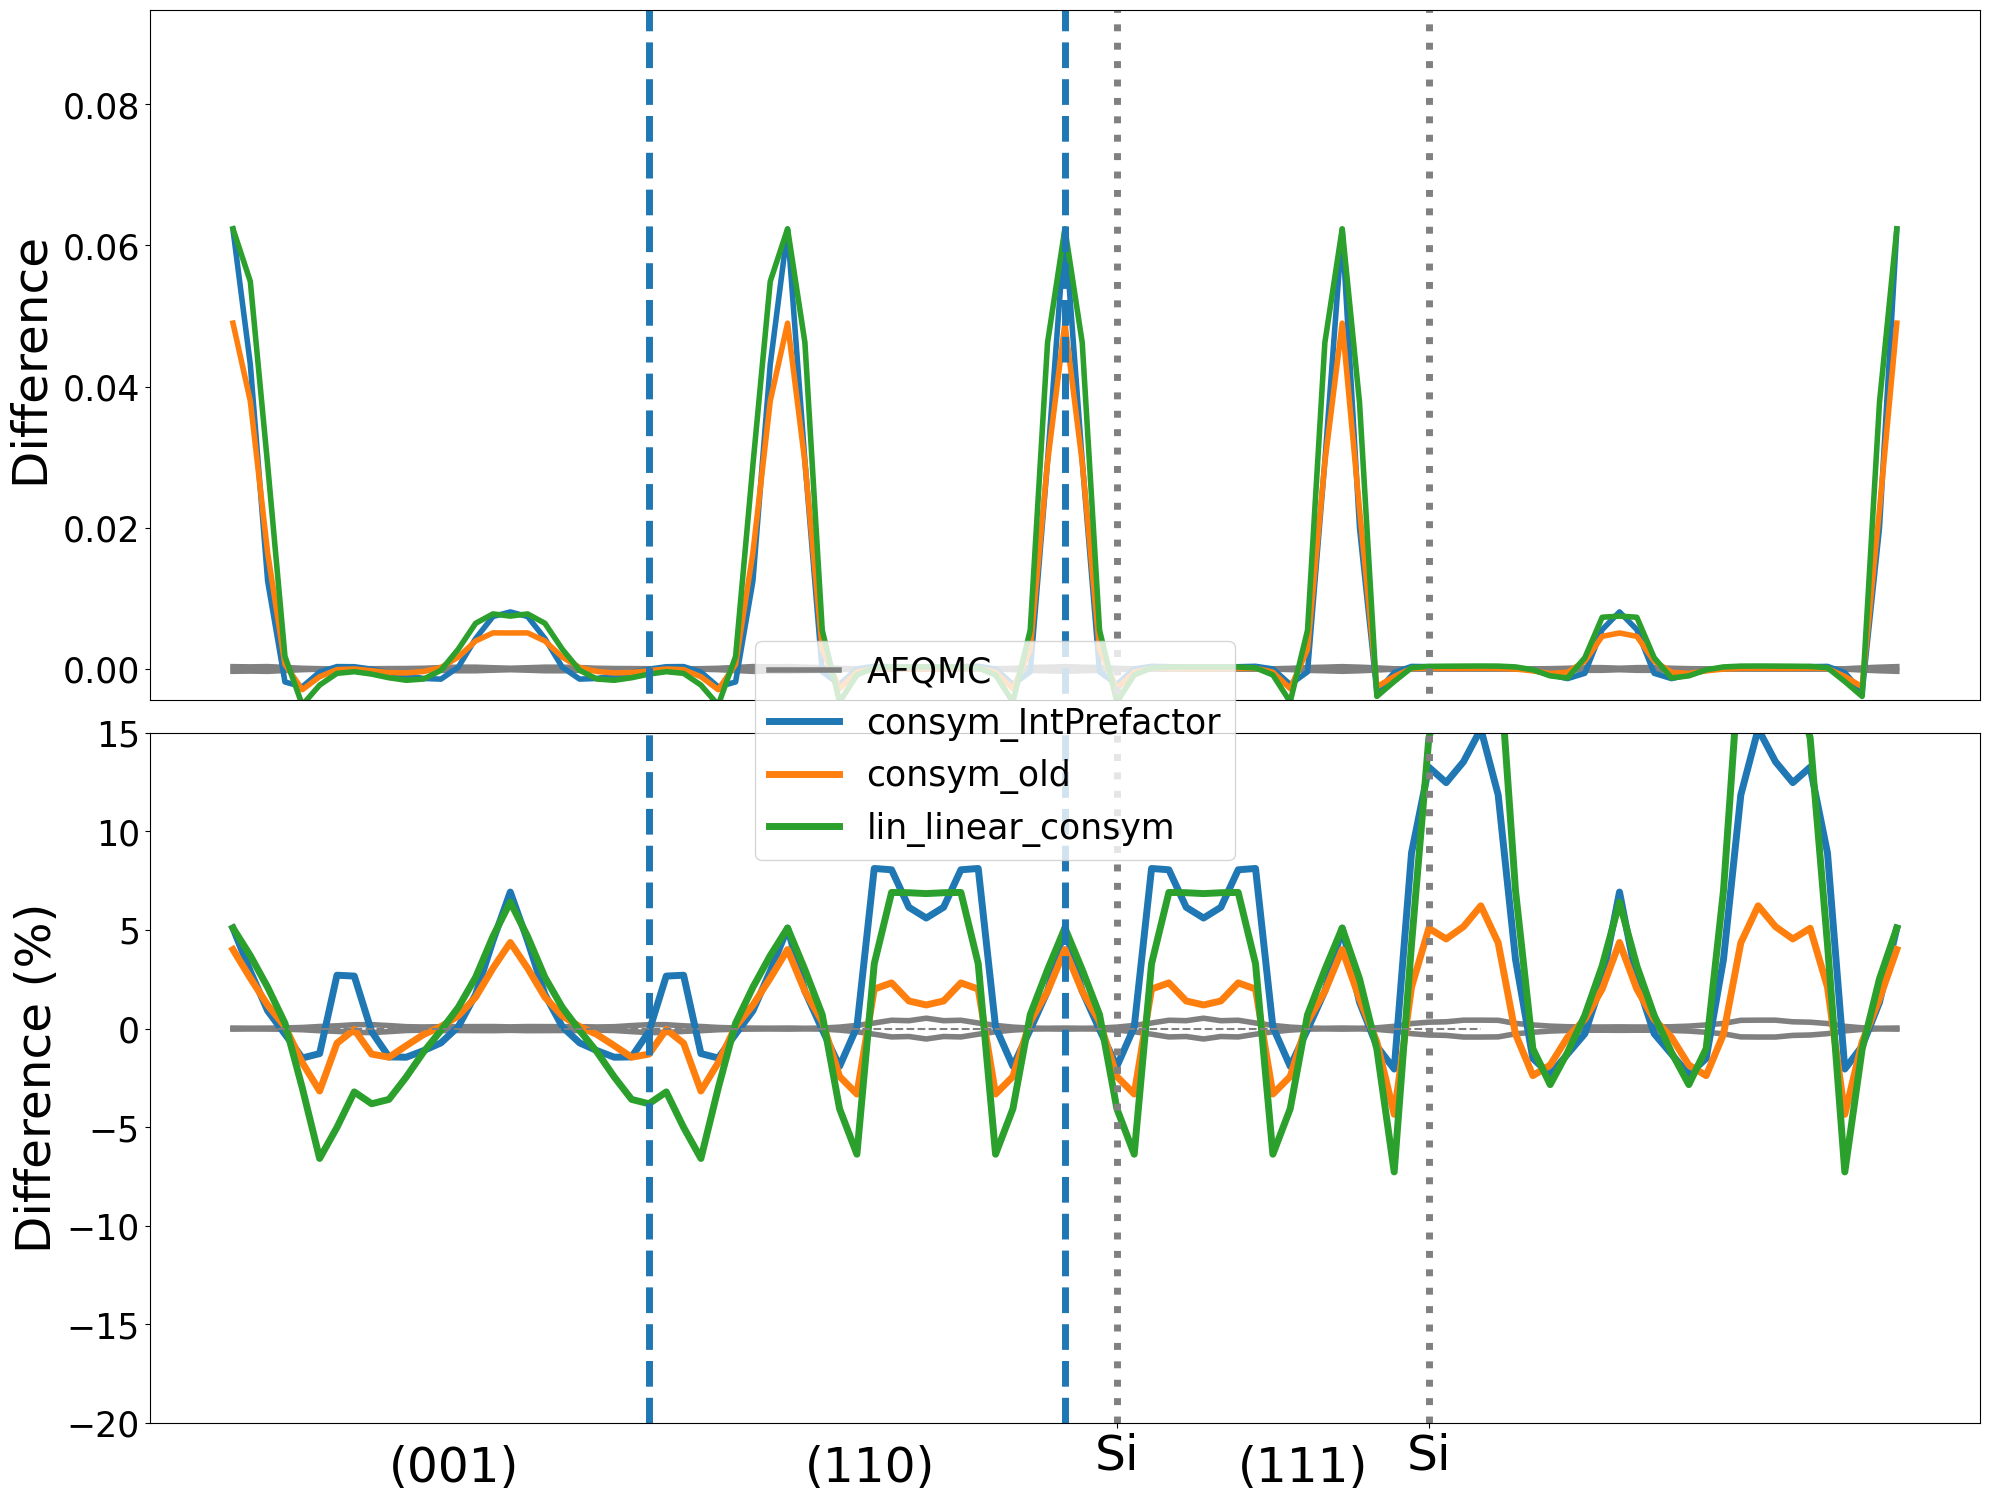

In [21]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz")
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
dens_con3= np.load("dens_history_LinSym_nacl.npz")["dens_history"][-1]

diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 
diff_con3= get_dens_inSD_nacl(dens_con3)-get_dens_inSD_nacl(newdens_QMC_nacl) 

diff_approx= [diff_con1, diff_con2,diff_con3] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old","lin_linear_consym"],erbar_nacl) 